In [2]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

def moving_average(x, n):
    x = np.asarray(x)
    weights = np.ones(n)
    weights /= weights.sum()
    return np.convolve(x, weights, mode='full')[:len(x)]

In [3]:
# data config
moving_average_width = 4000
log_path = "./loss_log.csv"

# load data
global_step, p_loss, v_loss = np.loadtxt(log_path, delimiter=',', unpack=True)
p_v_loss = p_loss + v_loss
p_loss_ma = moving_average(p_loss, moving_average_width)
v_loss_ma = moving_average(v_loss, moving_average_width)
p_v_loss_ma = p_loss_ma + v_loss_ma

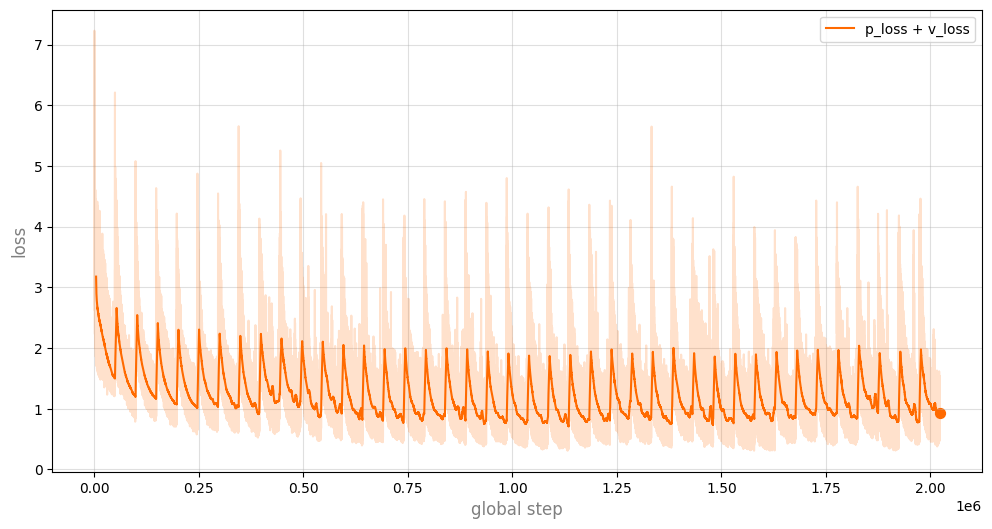

In [6]:
# plot config
show_each_loss = False
green_color = [29 / 255.0, 177 / 255.0, 0]
blue_color = [0, 118 / 255.0, 186 / 255.0]
yellow_color = [255 / 255.0, 106 / 255.0, 0]

# draw plot
plt.figure(figsize=(12, 6))
plt.grid(alpha=0.4)

if show_each_loss:
    plt.plot(global_step[moving_average_width:], v_loss_ma[moving_average_width:], color=green_color)
    plt.plot(global_step[moving_average_width:], p_loss_ma[moving_average_width:], color=blue_color)
    plt.plot(global_step, v_loss, color=green_color, alpha=0.2)
    plt.plot(global_step, p_loss, color=blue_color, alpha=0.2)
    # plt.ylim(0, 3)
    plt.scatter(global_step[-1], v_loss_ma[-1], s=50, color=green_color)
    plt.scatter(global_step[-1], p_loss_ma[-1], s=50, color=blue_color)
    legend_v_loss = mlines.Line2D([], [], color=green_color, label='v_loss')
    legend_p_loss = mlines.Line2D([], [], color=blue_color, label='p_loss')
    plt.legend(handles=[legend_p_loss,legend_v_loss])
else:
    plt.plot(global_step[moving_average_width:], p_v_loss_ma[moving_average_width:], color=yellow_color)
    plt.plot(global_step, p_v_loss, color=yellow_color, alpha=0.2)
    # plt.ylim(0, 4)
    plt.scatter(global_step[-1], p_v_loss_ma[-1], s=50, color=yellow_color)
    legend_p_v_loss = mlines.Line2D([], [], color=yellow_color, label='p_loss + v_loss')
    plt.legend(handles=[legend_p_v_loss])

plt.xlabel(u'global step', fontsize=12, alpha=0.5)
plt.ylabel(u'loss', fontsize=12, alpha=0.5)
plt.show()